In [1]:
!date

Fri Jul  5 16:54:52 PDT 2019


# File Sizes

In [20]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve
from upsetplot import generate_data, plot, from_memberships
from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("./file_sizes.txt")

In [7]:
df["ratio_out_in"] = (df["output.bus_size"] + df["transcripts.txt_size"] + df["matrix.ec_size"])/df["fastq.gz_size"]

In [15]:
df = df.sort_values("fastq.gz_size")

In [16]:
df

,ID,fastq.gz_size,output.bus_size,transcripts.txt_size,matrix.ec_size,ratio,ratio_out_in
18,SRR8599150_v2,947876296,114424145,2110501,15780569,0.139591,0.139591
19,SRR8611943_v2,1652729940,535899153,327083,1007720,0.325059,0.325059
10,SRR6998058_v2,4366628270,934446865,2110501,16876187,0.218345,0.218345
5,hgmm1k_v3,4436987535,1528638193,7405641,73536333,0.362764,0.362764
8,pbmc1k_v3,5038856791,1309064433,2766592,41380228,0.268555,0.268555
4,hgmm1k_v2,5259455044,1949348625,7405641,72591489,0.385847,0.385847
13,SRR8206317_v2,5647635810,2201795025,2110501,18815484,0.393567,0.393567
2,heart1k_v3,5816311093,1899895281,2110501,19221662,0.330317,0.330317
1,heart1k_v2,6046497907,2231191249,2110501,18100639,0.372348,0.372348
17,SRR8524760_v2,8318162826,2268102673,2766592,39037765,0.277694,0.277694


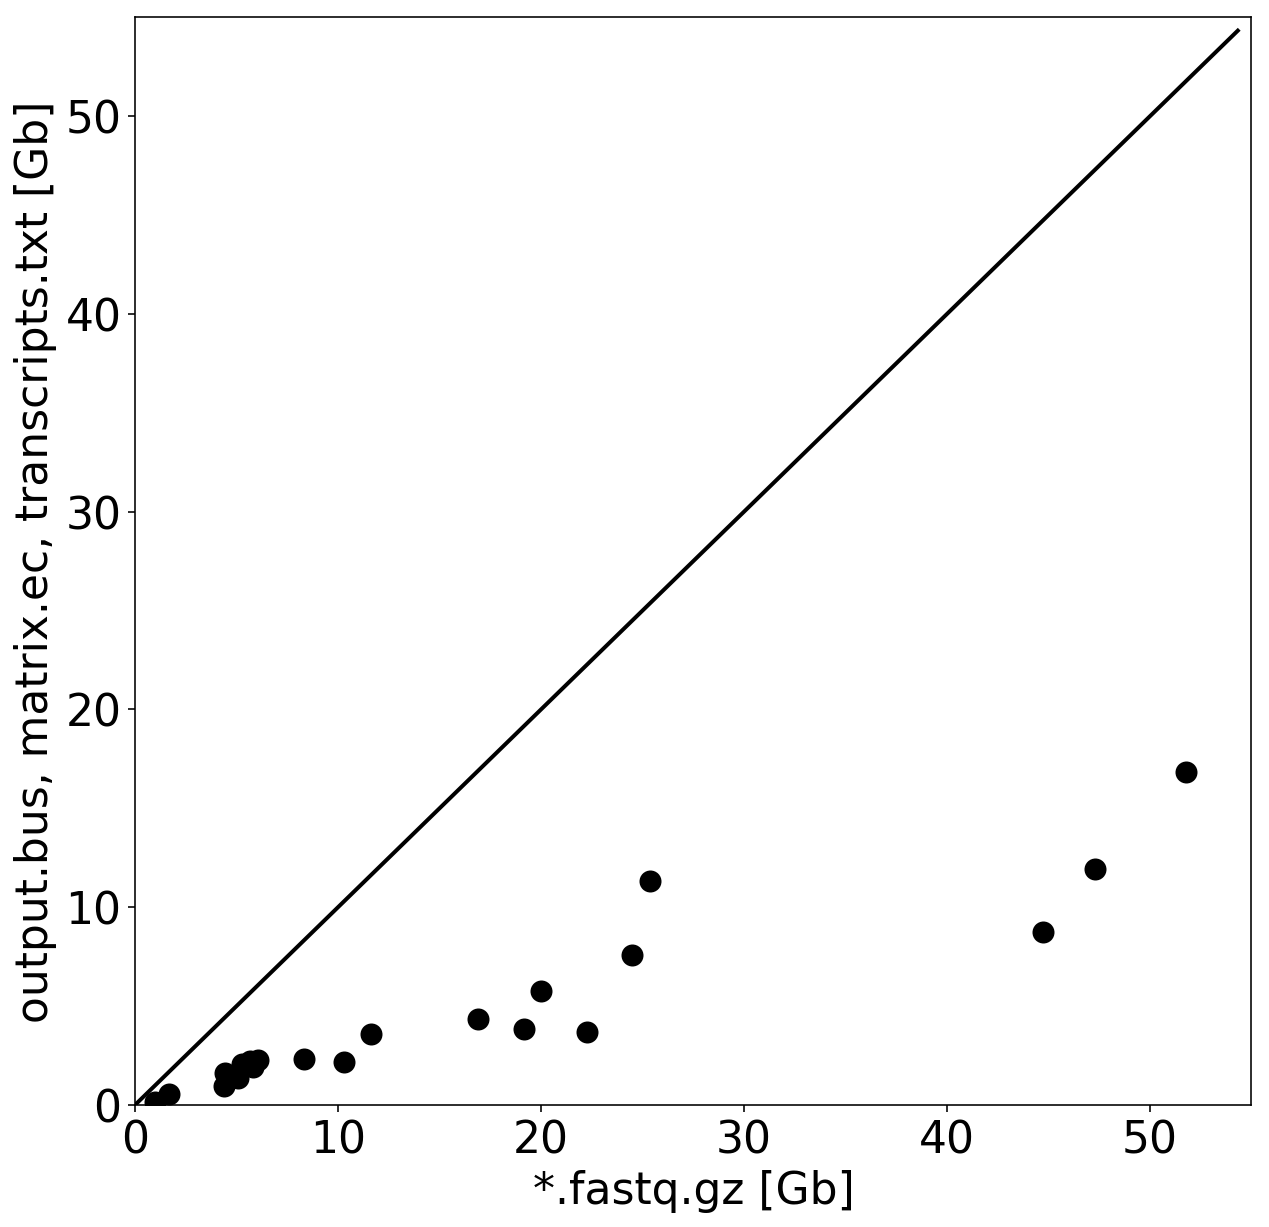

In [44]:
N = df.shape[0]
out_color = '#FF7F0E'
in_color = '#1F77B4'
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
#rects1 = ax.bar(ind, df["fastq.gz_size"]/10**9, width, color=in_color)

#rects2 = ax.bar(ind + width, (df["output.bus_size"] + df["transcripts.txt_size"] + df["matrix.ec_size"])/10**9, width, color=out_color)
ax.scatter(df["fastq.gz_size"]/10**9, (df["output.bus_size"] + df["transcripts.txt_size"] + df["matrix.ec_size"])/10**9, color="black", s=100)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color="black", linewidth=2)

# add some text for labels, title and axes ticks
ax.set_xlim(0, 55)
ax.set_ylim(0, 55)
ax.set_xlabel('*.fastq.gz [Gb]')
ax.set_ylabel('output.bus, matrix.ec, transcripts.txt [Gb]')


plt.show()